In [1]:
import cv2
from PIL import Image, ImageEnhance
import os
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [2]:
path_temp_folder_images = "data/resumes/temp/"
# Se utiliza como base para generar el nombre de la carpeta
base_path_folder_images = "data/resumes/temp/images_resumes"



In [3]:
path_directories = [x[0]  for x in os.walk(path_temp_folder_images)]

folder_rectagles = list(filter(lambda x: '_rectangles' in x, path_directories))

print(folder_rectagles)

#Eliminar carpetas temporales

for dir in folder_rectagles:
    
    if os.path.exists(dir):

        shutil.rmtree(dir)

    else:
        # file not found message
        print("File not found in the directory")

['data/resumes/temp/images_resumes_105.pdf_rectangles', 'data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_1_105', 'data/resumes/temp/images_resumes_105.pdf_rectangles/cuts_2_105', 'data/resumes/temp/images_resumes_102.pdf_rectangles', 'data/resumes/temp/images_resumes_106.pdf_rectangles', 'data/resumes/temp/images_resumes_107.pdf_rectangles', 'data/resumes/temp/images_resumes_10.pdf_rectangles', 'data/resumes/temp/images_resumes_100.pdf_rectangles', 'data/resumes/temp/images_resumes_104.pdf_rectangles', 'data/resumes/temp/images_resumes_103.pdf_rectangles', 'data/resumes/temp/images_resumes_1.pdf_rectangles', 'data/resumes/temp/images_resumes_101.pdf_rectangles']
File not found in the directory
File not found in the directory


In [4]:
path_directories_base = [x[0] for x in os.walk(path_temp_folder_images)]

In [5]:
# Quitar directorio raíz
index = 0
for item in path_directories_base:
    if item == path_temp_folder_images:
        path_directories_base.pop(index)
    index += 1

In [6]:
path_directories_base

['data/resumes/temp/images_resumes_1.pdf',
 'data/resumes/temp/images_resumes_104.pdf',
 'data/resumes/temp/images_resumes_101.pdf',
 'data/resumes/temp/images_resumes_106.pdf',
 'data/resumes/temp/images_resumes_107.pdf',
 'data/resumes/temp/images_resumes_105.pdf',
 'data/resumes/temp/images_resumes_100.pdf',
 'data/resumes/temp/images_resumes_102.pdf',
 'data/resumes/temp/images_resumes_10.pdf',
 'data/resumes/temp/images_resumes_103.pdf']

In [7]:
def get_files_in_directory(path_directory, extension):

    onlyfiles = [f for f in listdir(path_directory) if isfile(join(path_directory, f))]

    files_names = list(filter(lambda x: '.'+extension in x, onlyfiles))
    
    files_names.sort()
    
    return files_names

In [8]:
def Process_Image(pathImage, path_result_image):
    # Load image, grayscale, Gaussian blur, Otsu's threshold
    image = cv2.imread(pathImage, 0)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #plt.title('Image')
    #plt.imshow(image, cmap='gray') 
    #plt.show()

    blur = cv2.GaussianBlur(image, (7,7), cv2.BORDER_DEFAULT)
    
    #plt.title('Blur')
    #plt.imshow(blur, cmap='gray') 
    #plt.show()
    
    thresh  = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    #cv2.imshow('thresh', thresh)
    #cv2.waitKey()

    # Create rectangular structuring element and dilate
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (60,15))
    dilate = cv2.dilate(thresh, kernel, iterations=8)

    # Find contours and draw rectangle
    cnts = cv2.findContours(dilate, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    imageColor = cv2.imread(pathImage)
    
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(imageColor, (x, y), (x + w, y + h), (255,0,0), 4)

    #cv2.imshow('thresh', thresh)
    #cv2.imshow('dilate', dilate)
    #cv2.imshow('image', image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    fig = plt.figure()
    fig.set_size_inches(10,23)
    plt.title('Rectangulos')
    plt.imshow(imageColor, cmap='gray', aspect='auto') 
    plt.show()
    
    cv2.imwrite(path_result_image, imageColor)


####################
data/resumes/temp/images_resumes_1.pdf
1_1.jpeg


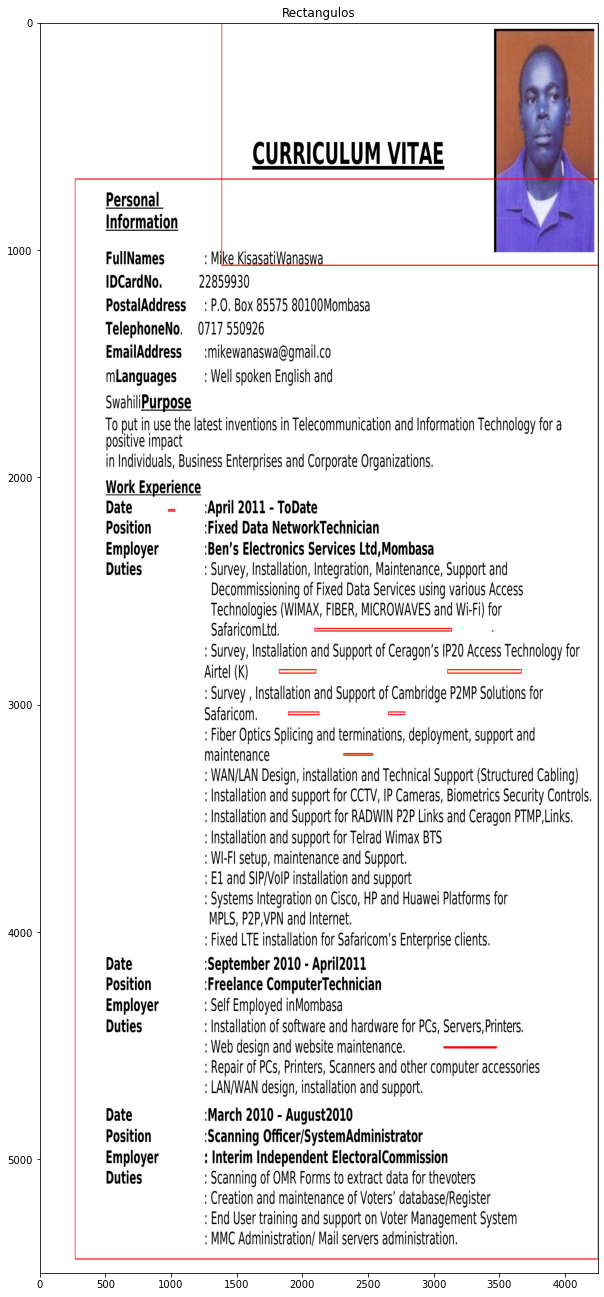

2_1.jpeg


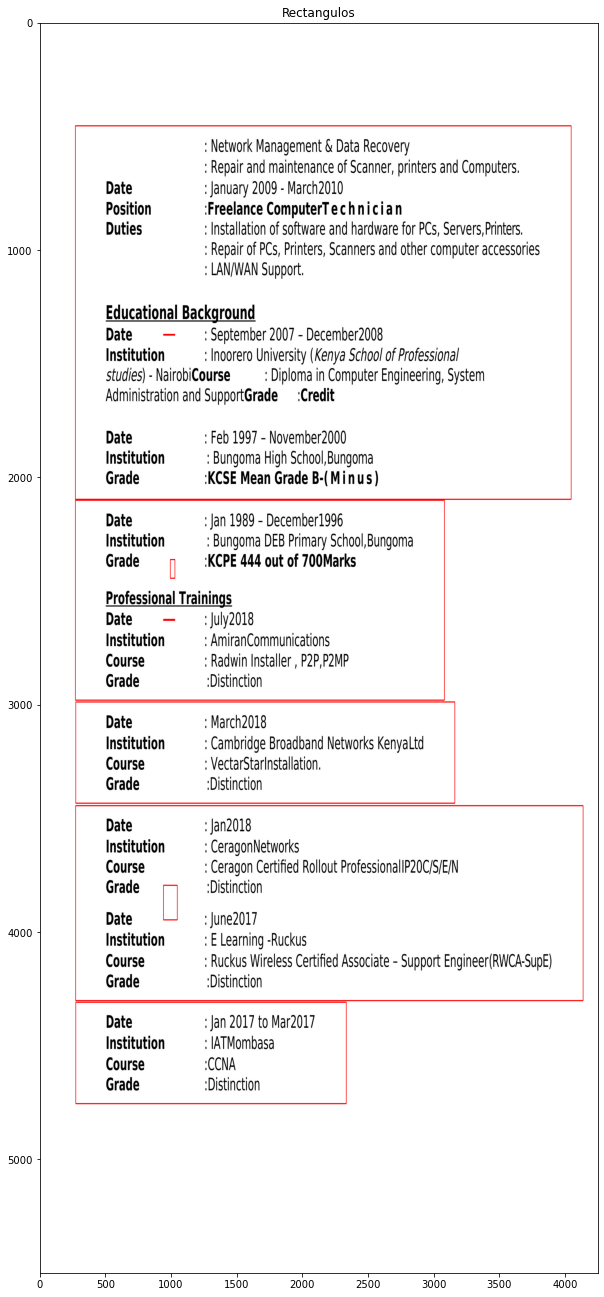

3_1.jpeg


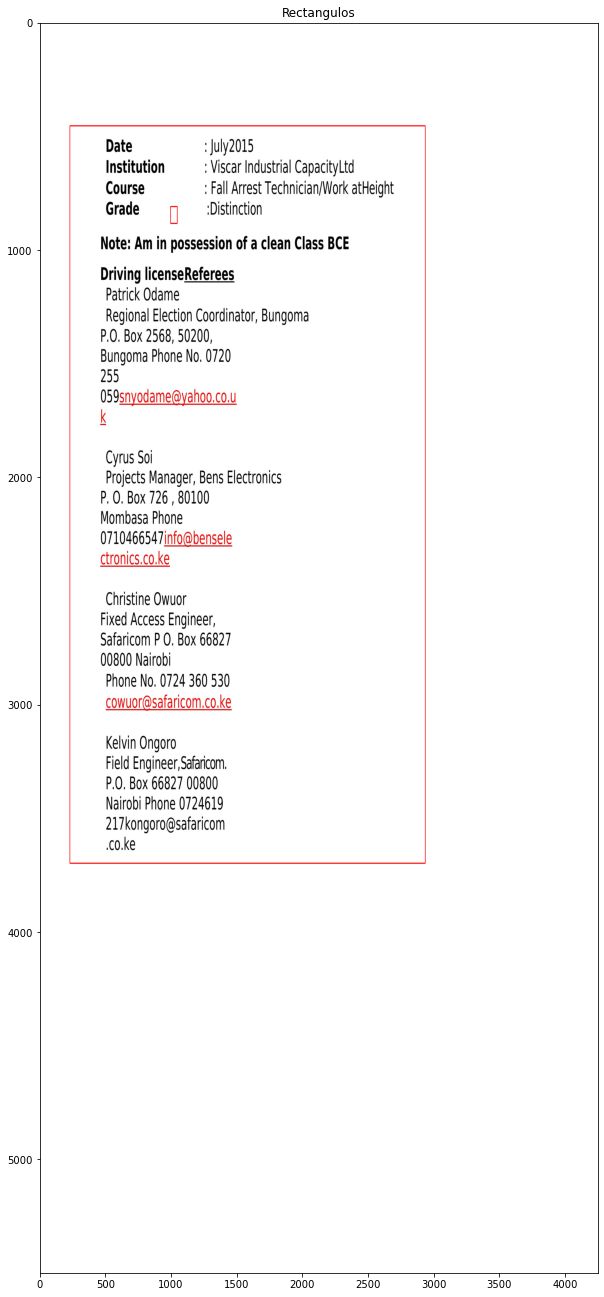

####################
data/resumes/temp/images_resumes_104.pdf
1_104.jpeg


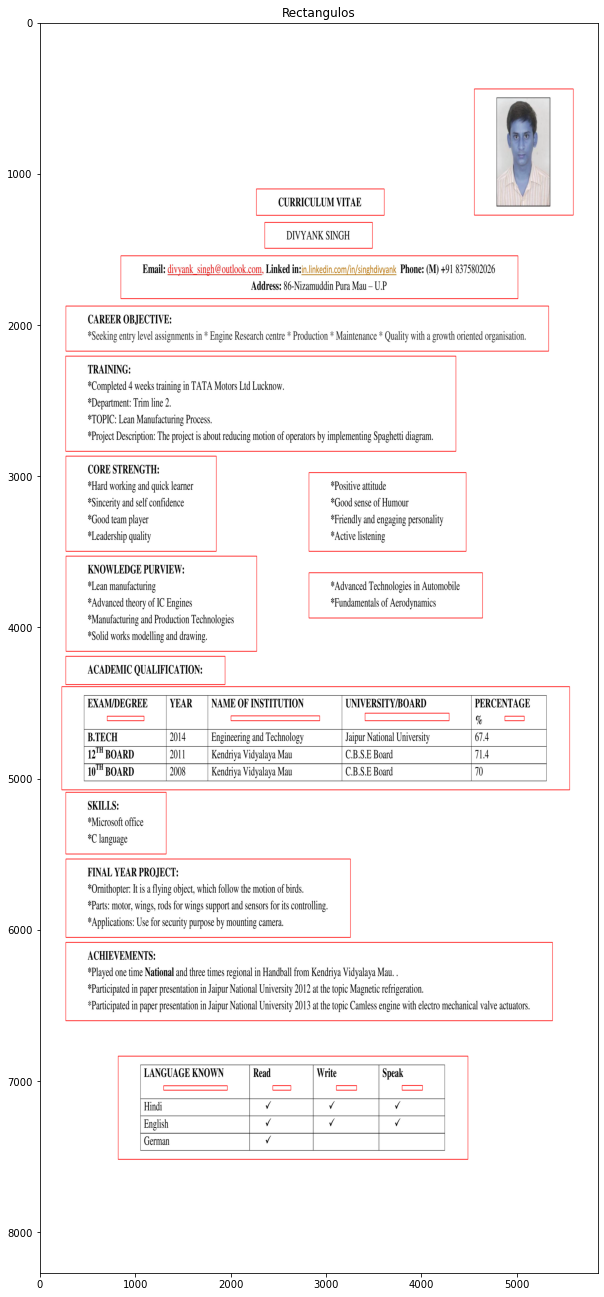

2_104.jpeg


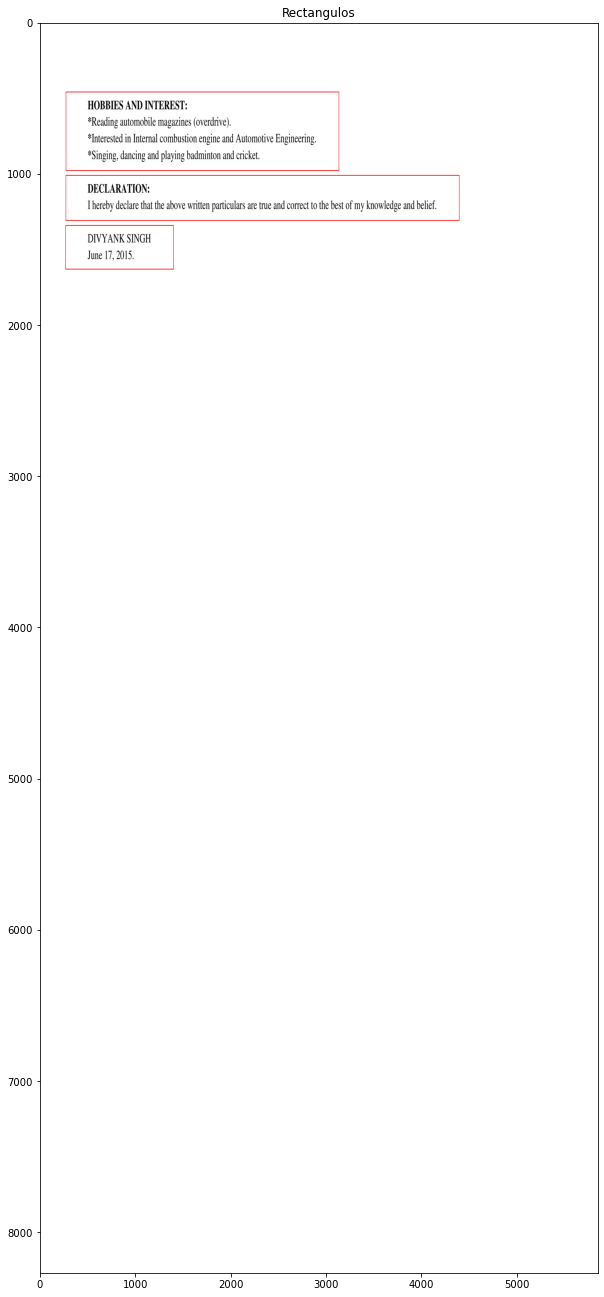

####################
data/resumes/temp/images_resumes_101.pdf
1_101.jpeg


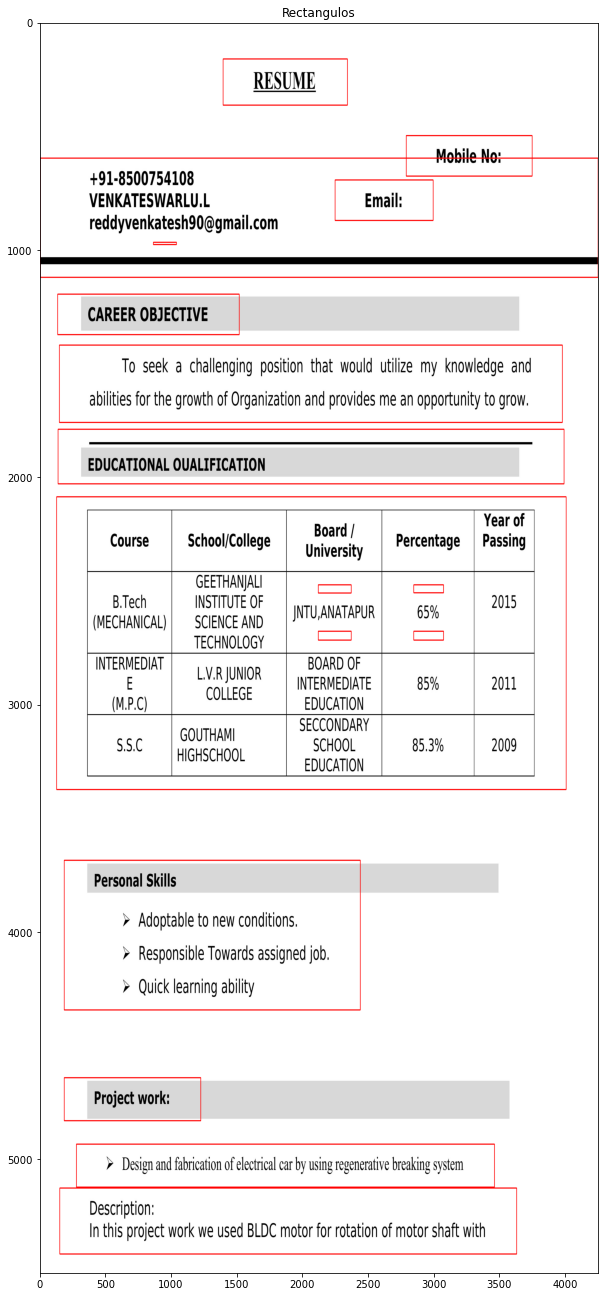

2_101.jpeg


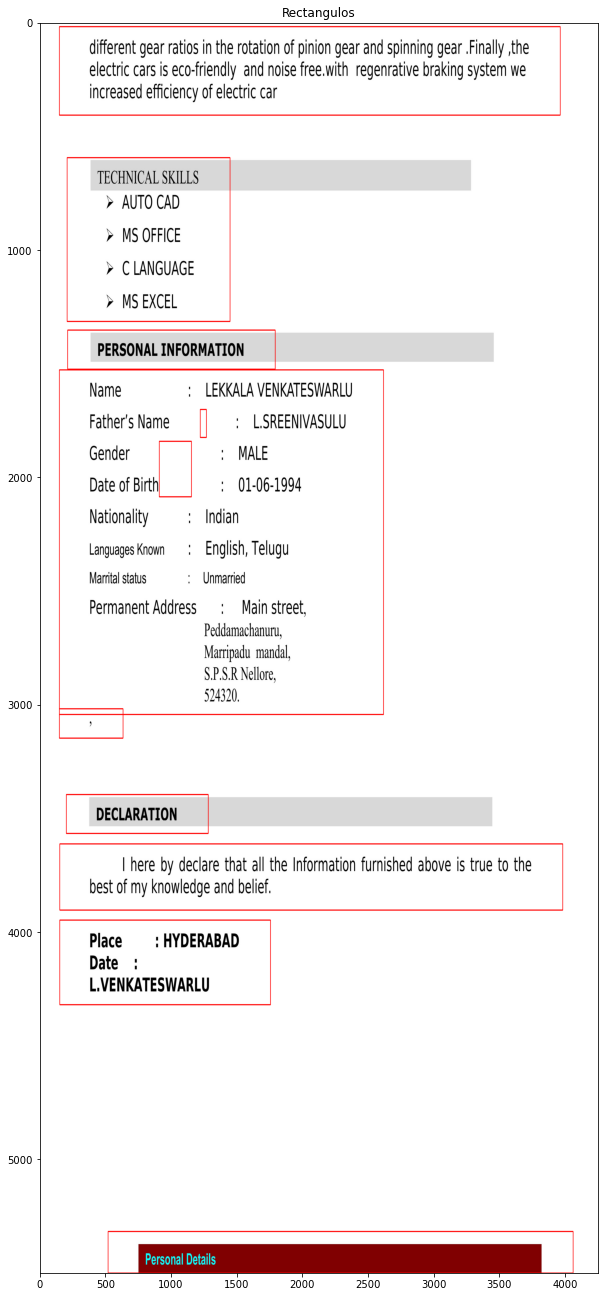

####################
data/resumes/temp/images_resumes_106.pdf
1_106.jpeg


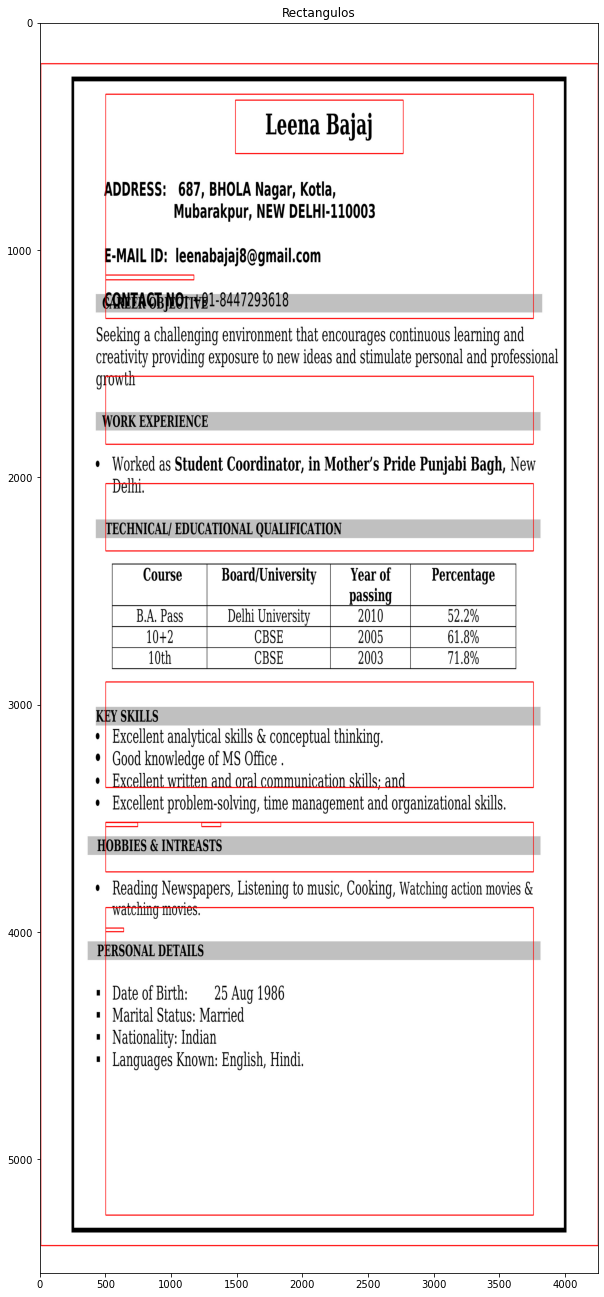

####################
data/resumes/temp/images_resumes_107.pdf
1_107.jpeg


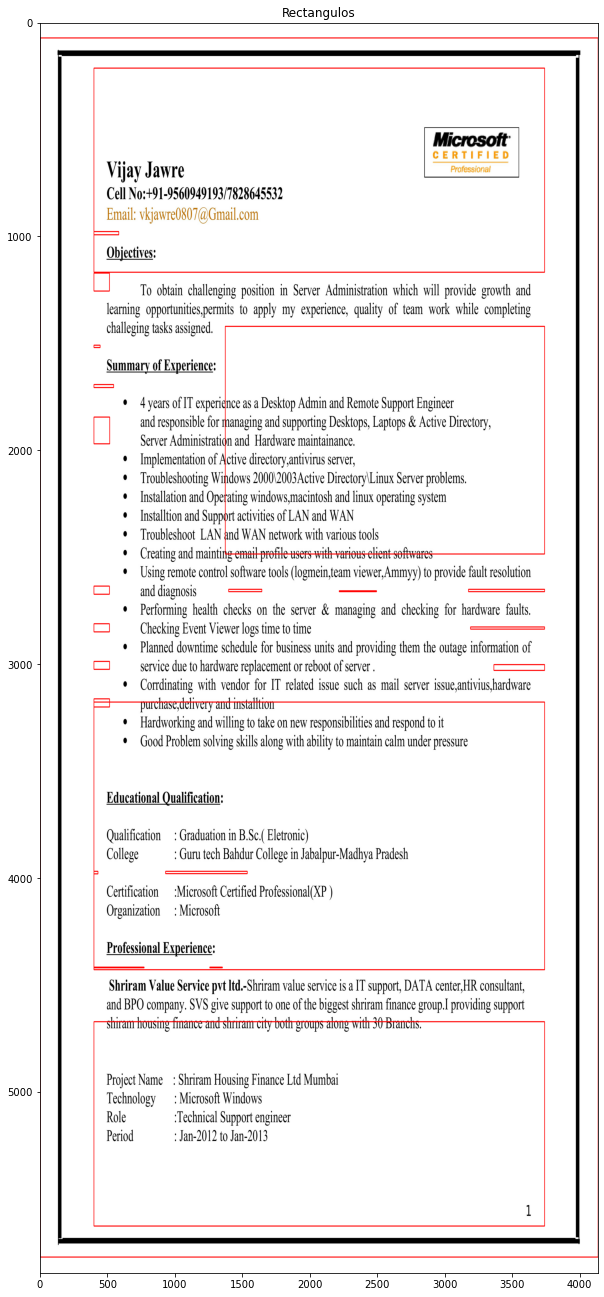

2_107.jpeg


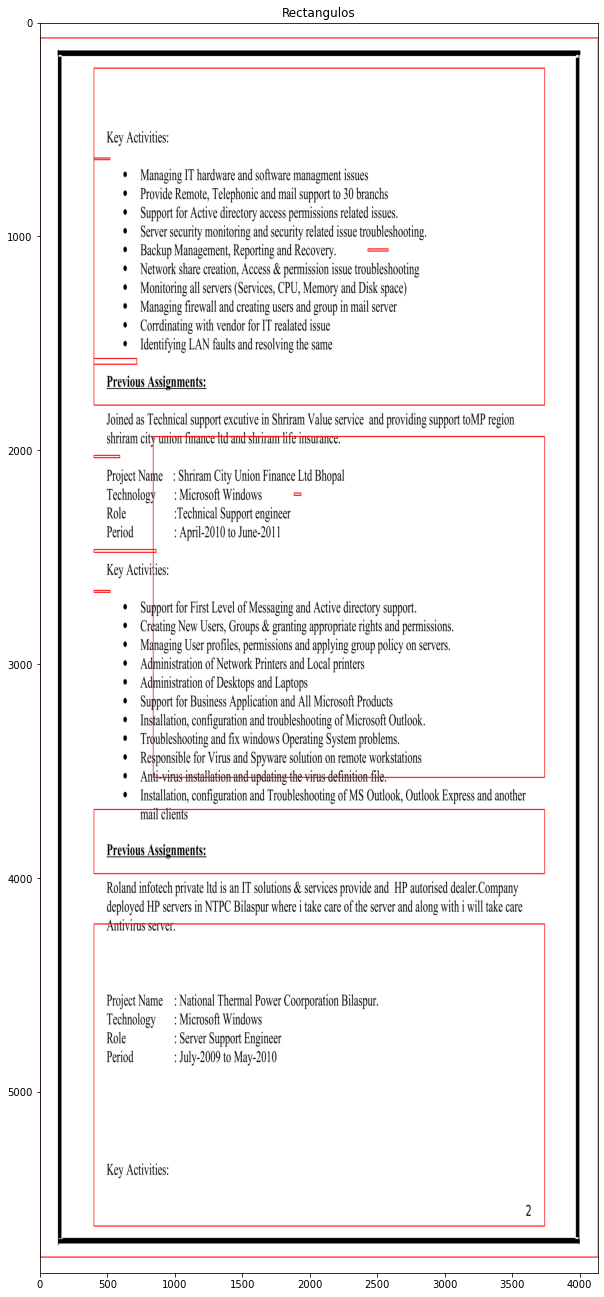

3_107.jpeg


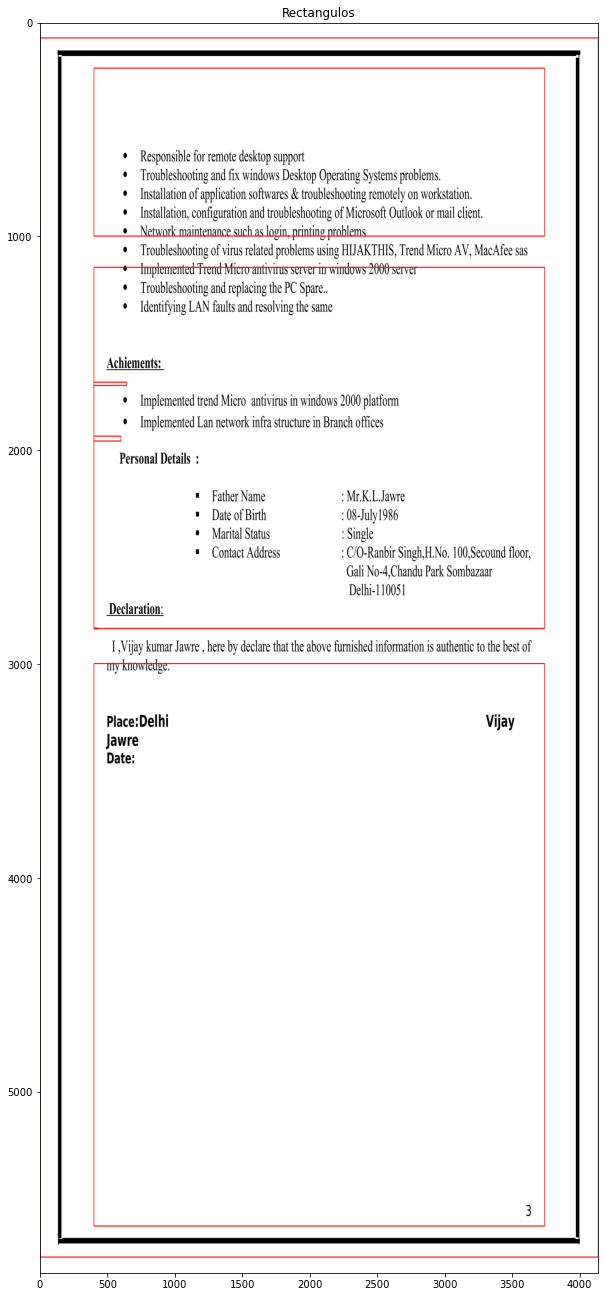

####################
data/resumes/temp/images_resumes_105.pdf
1_105.jpeg


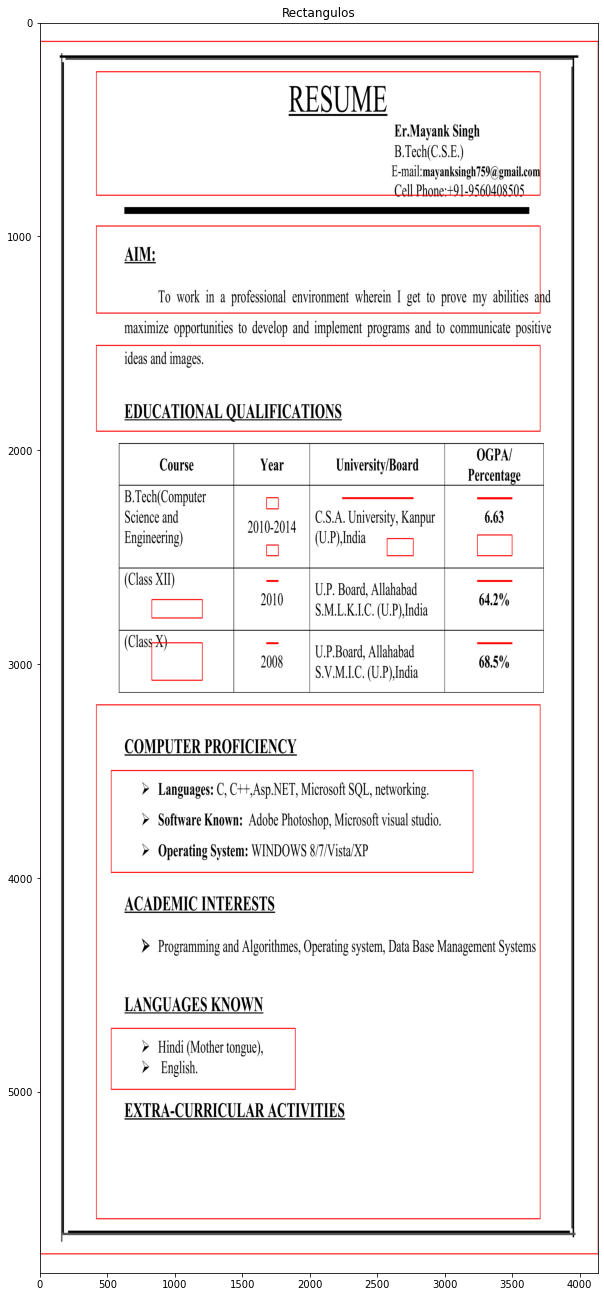

2_105.jpeg


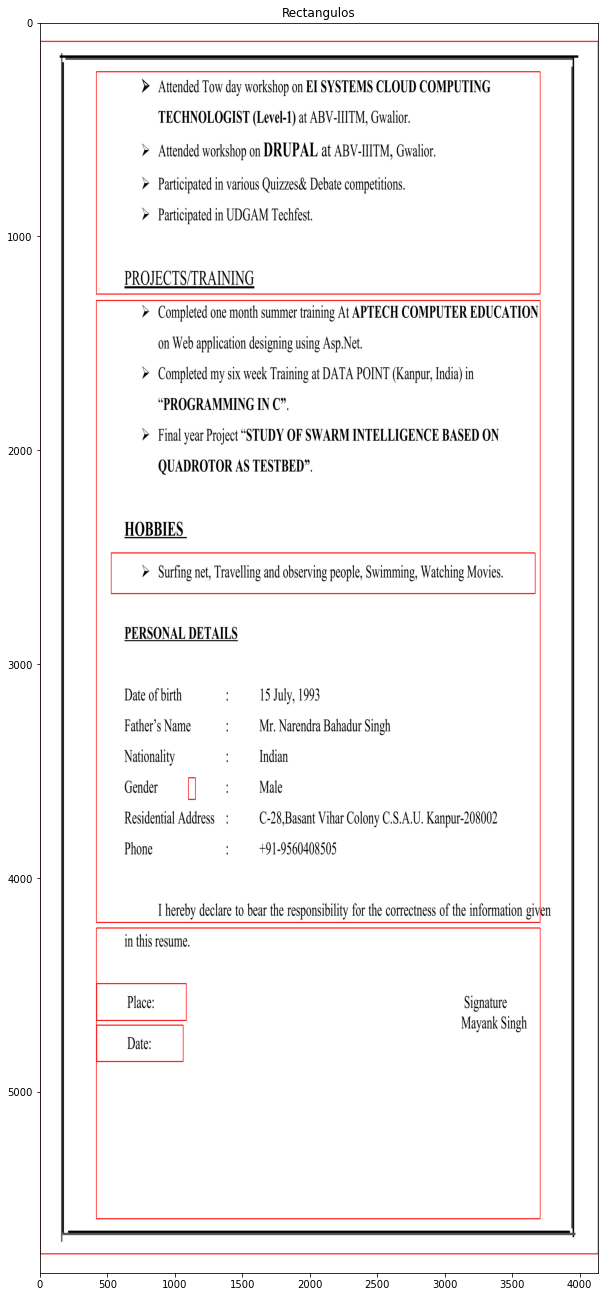

####################
data/resumes/temp/images_resumes_100.pdf
1_100.jpeg


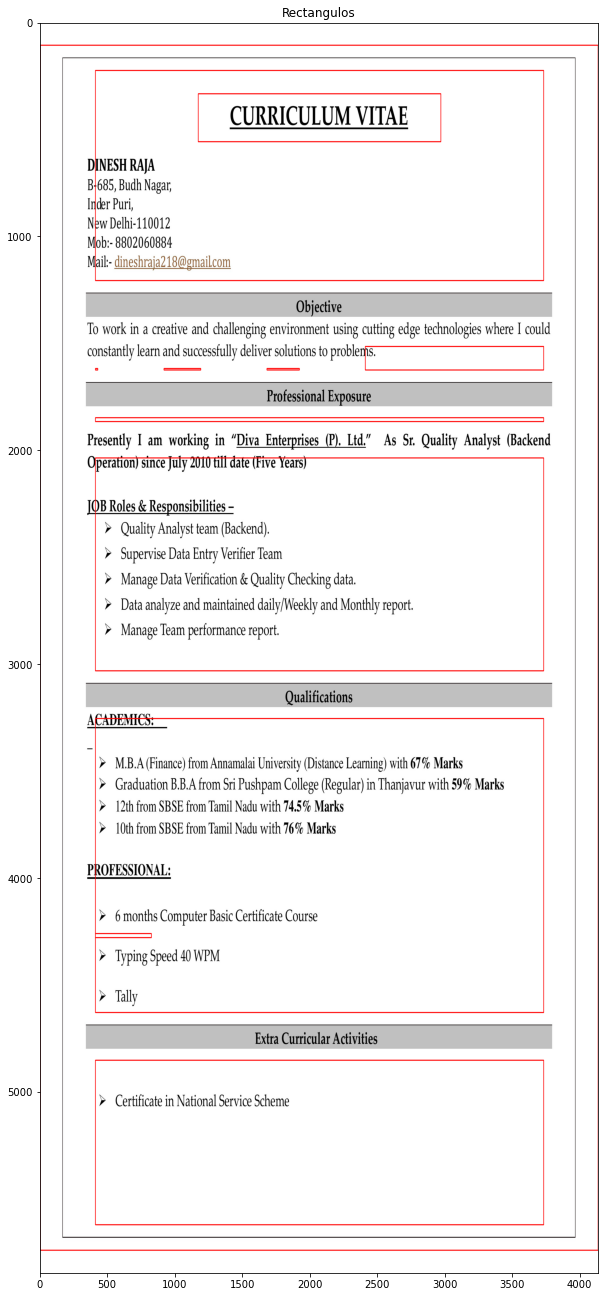

2_100.jpeg


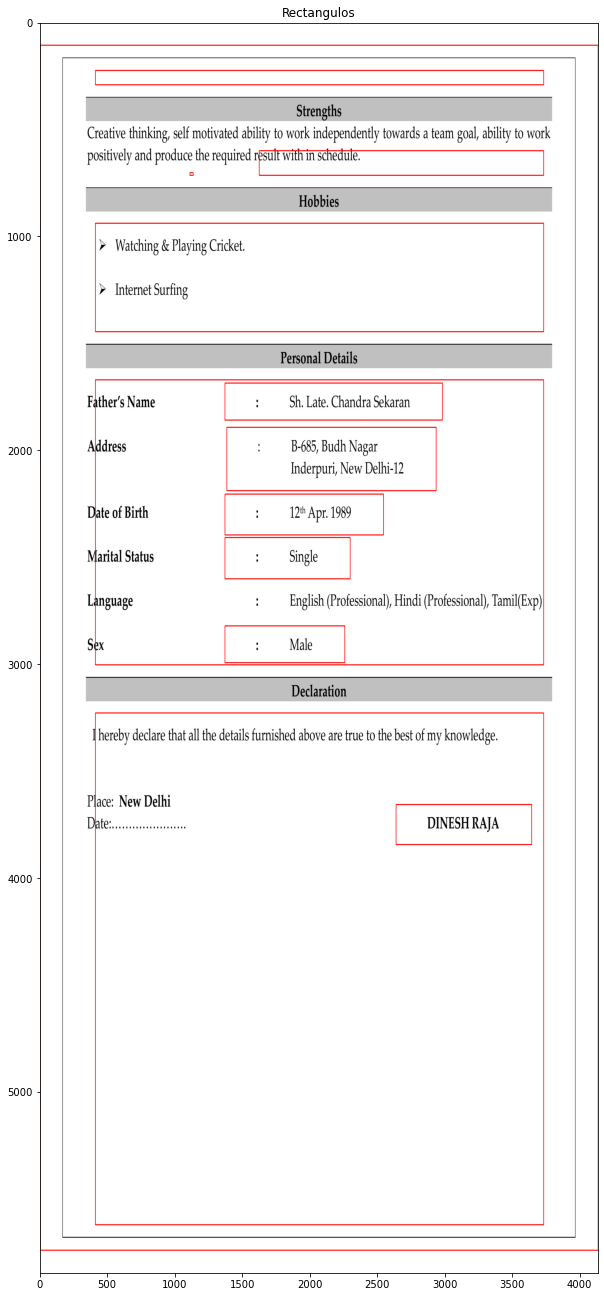

####################
data/resumes/temp/images_resumes_102.pdf
1_102.jpeg


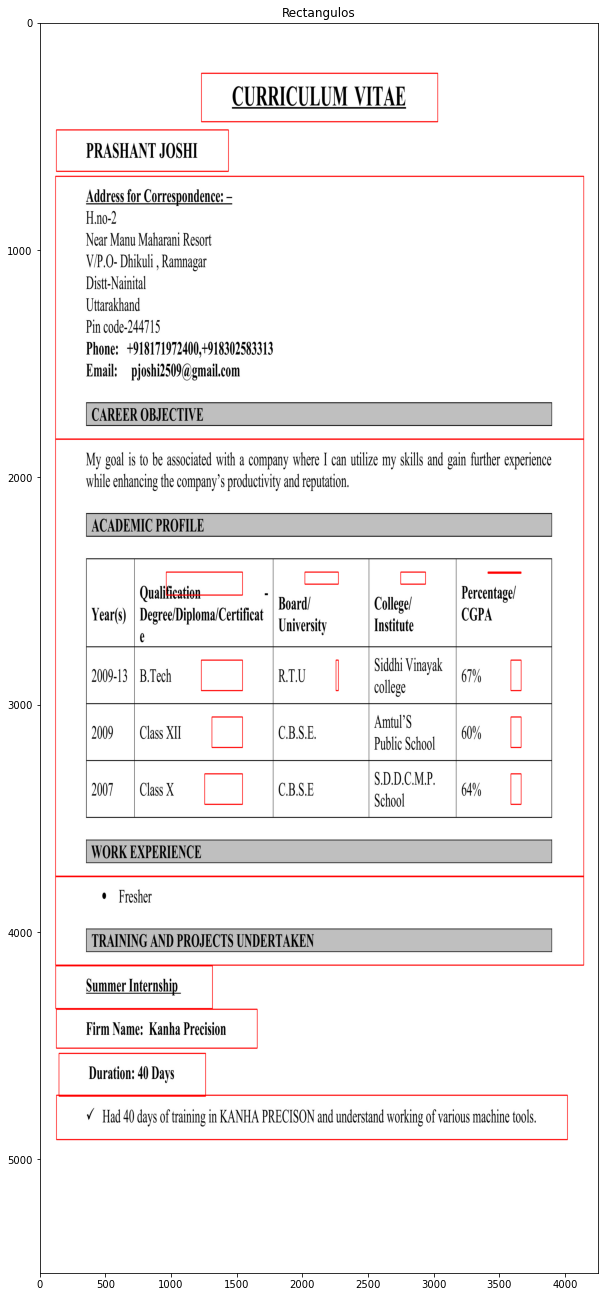

2_102.jpeg


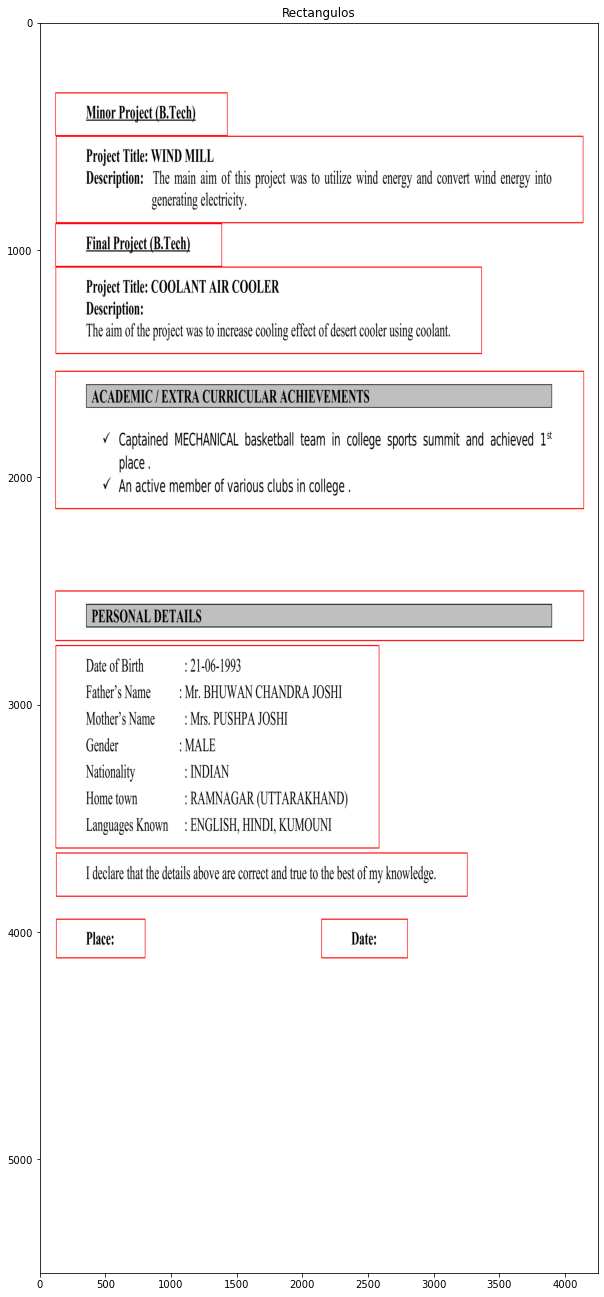

####################
data/resumes/temp/images_resumes_10.pdf
1_10.jpeg


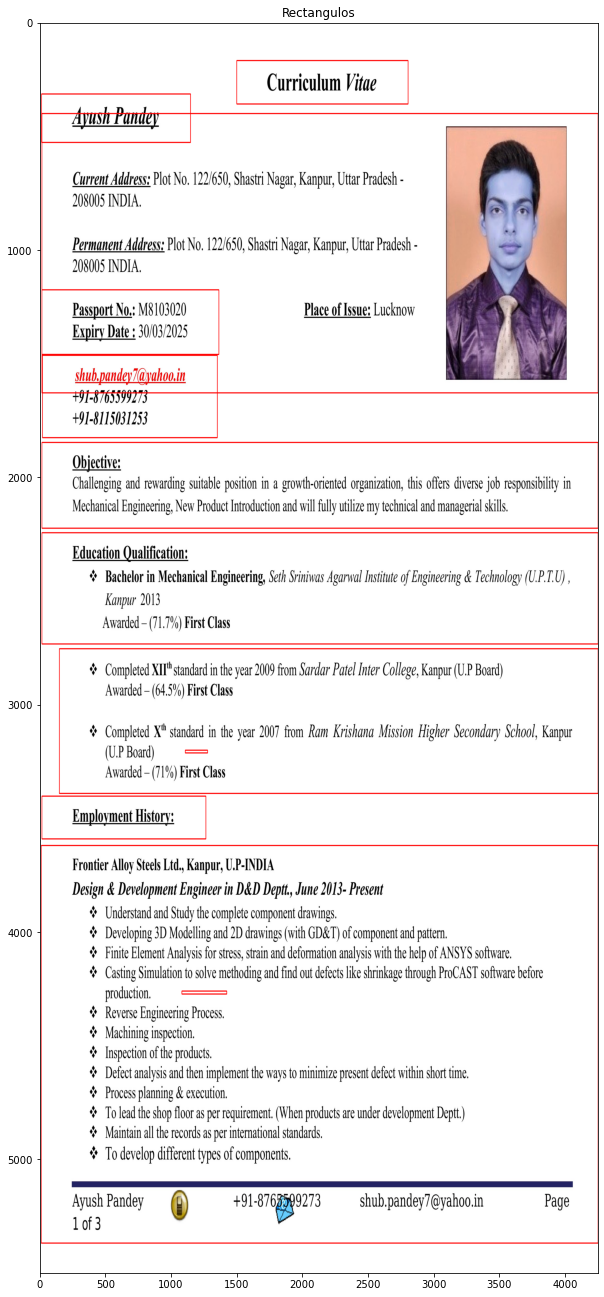

2_10.jpeg


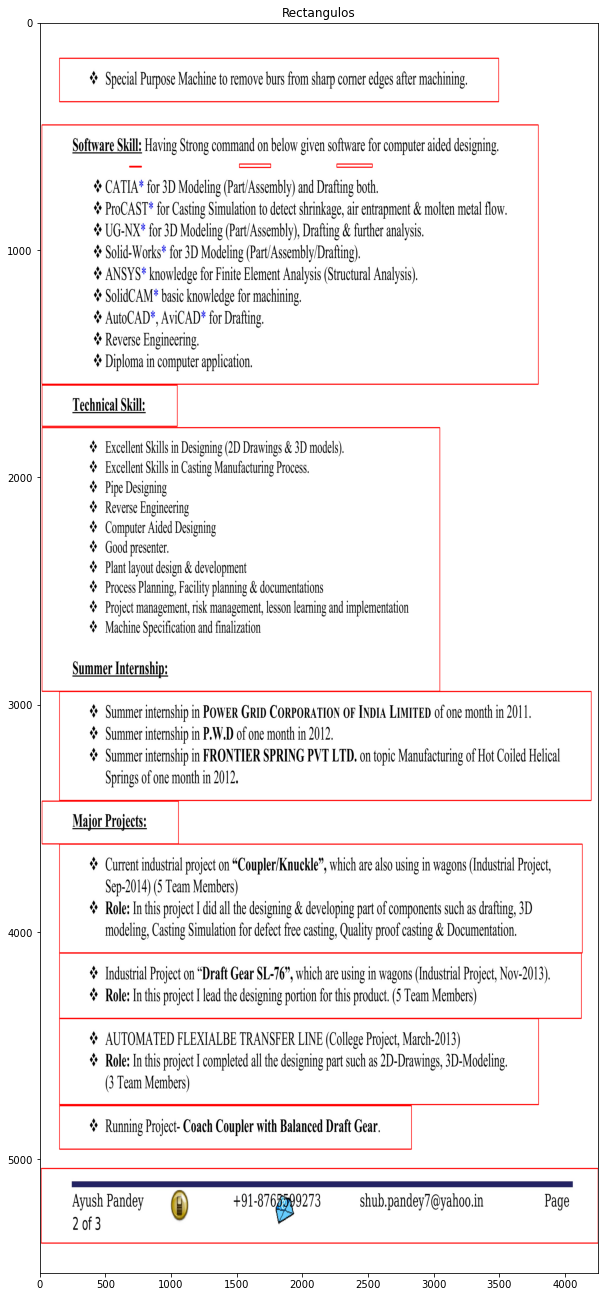

3_10.jpeg


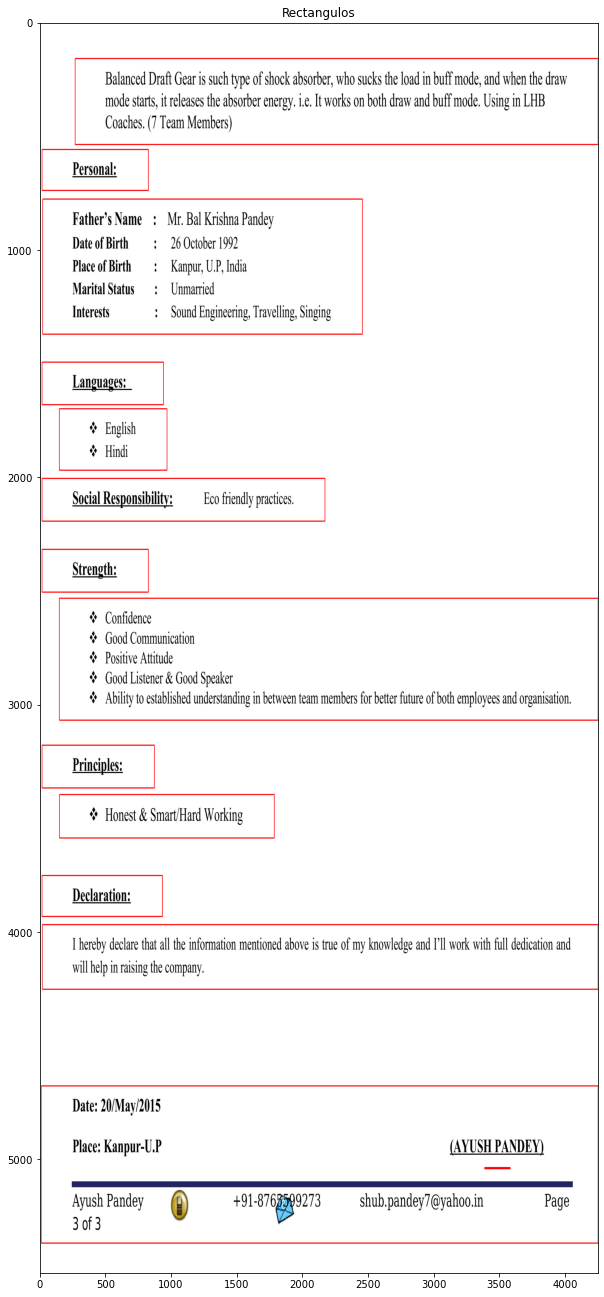

4_10.jpeg


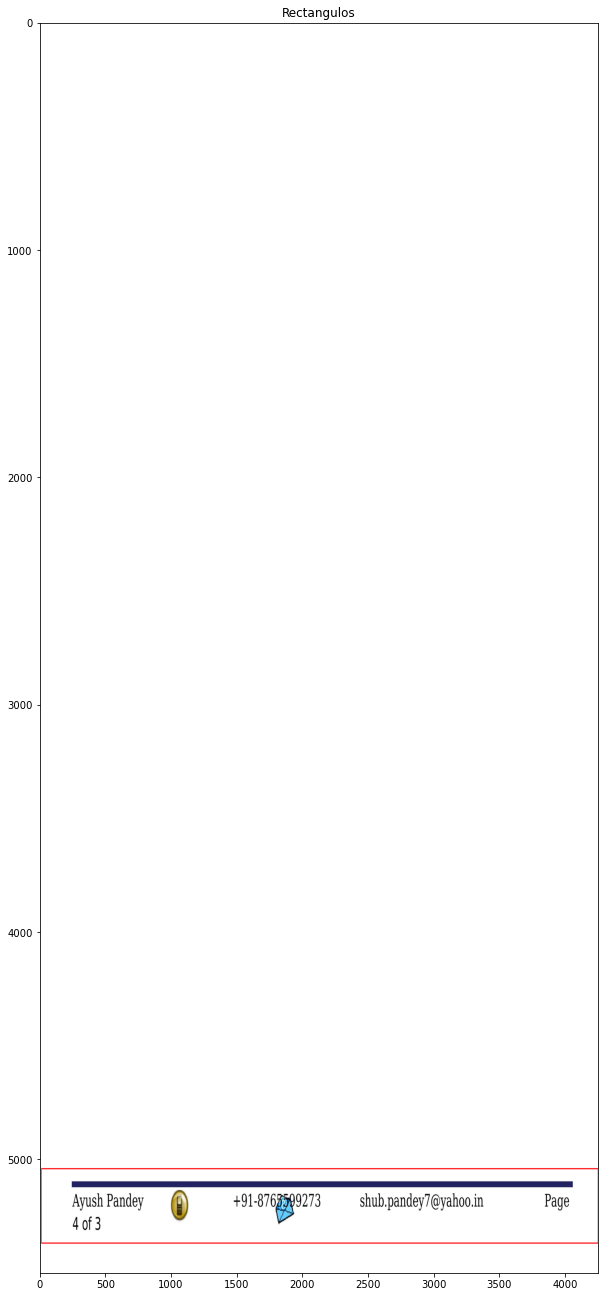

####################
data/resumes/temp/images_resumes_103.pdf
1_103.jpeg


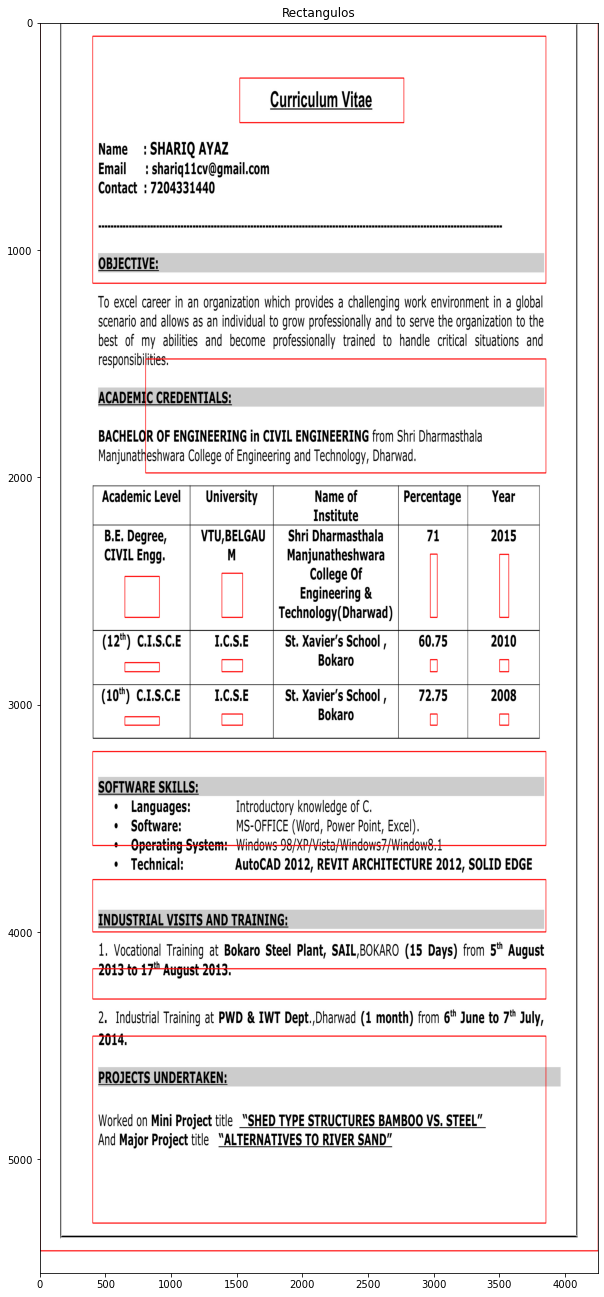

2_103.jpeg


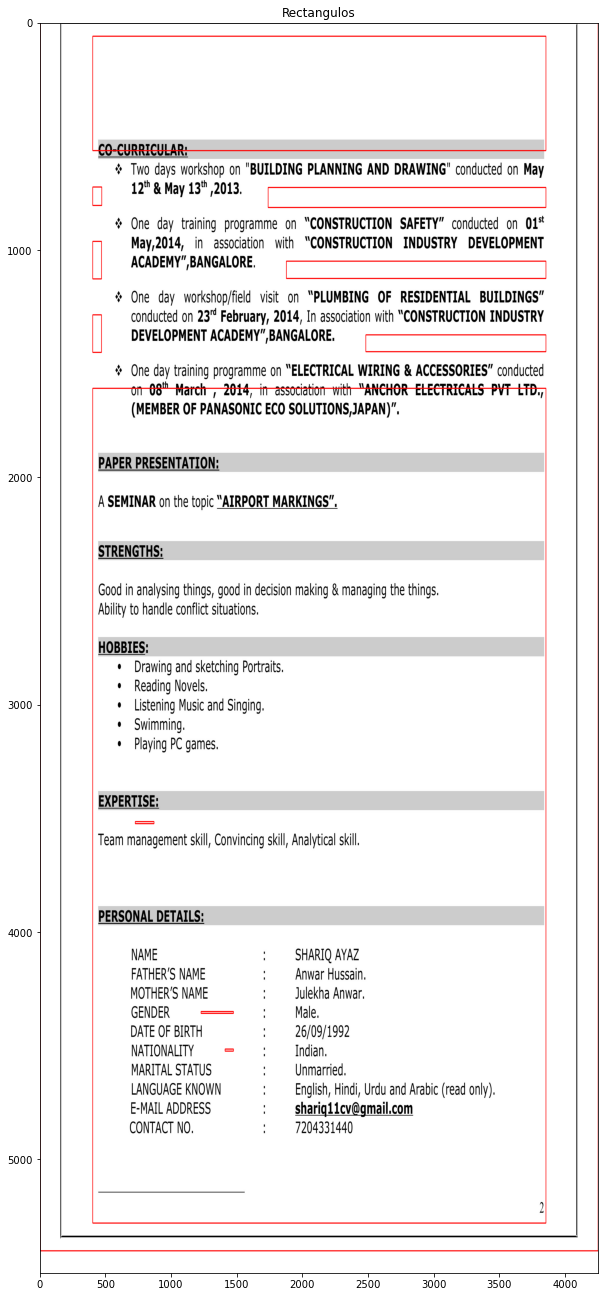

3_103.jpeg


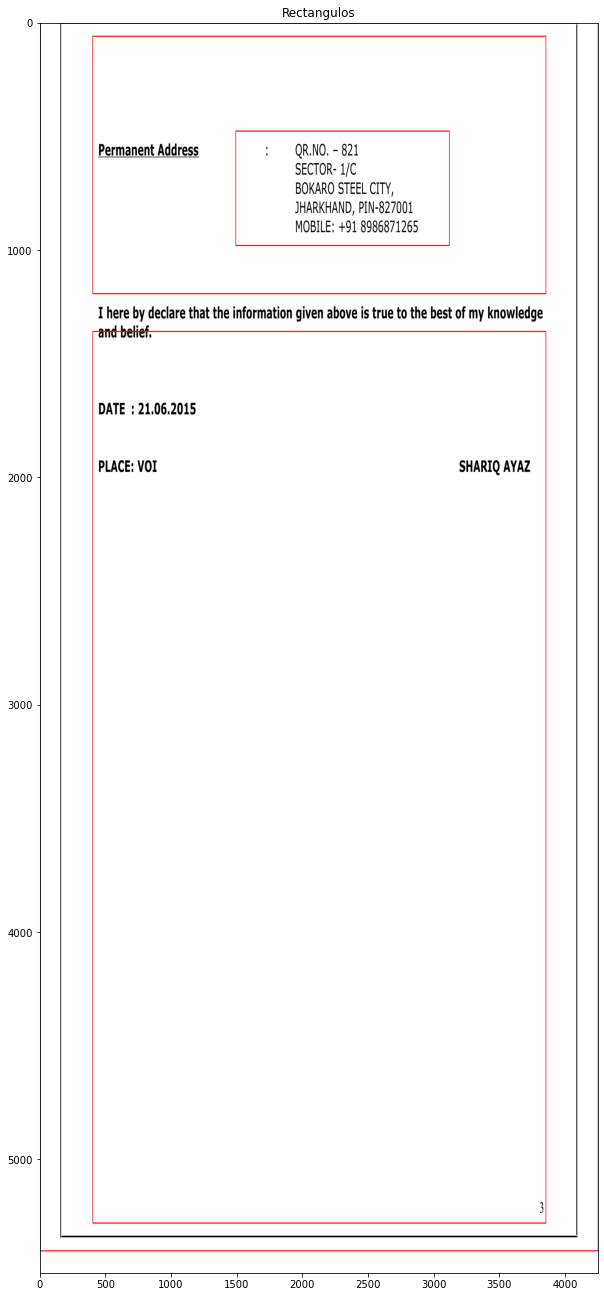

In [9]:

for directory in path_directories_base:
    print("####################")
    print(directory)
    pages_images = files_names = get_files_in_directory(directory, "jpeg")
    for page_image in pages_images:
        print(page_image)
        part_name_file = page_image.split(".")
        
        pat_original_image = join(directory,page_image);
        #print(pat_original_image)
        
        result_image_restangle_folder = directory + "_rectangles"
        
        isExistFolder = os.path.exists(result_image_restangle_folder)

        if not isExistFolder:
            #print(result_image_restangle_folder)
            os.makedirs(result_image_restangle_folder)
        
        result_path_image = join(result_image_restangle_folder,part_name_file[0] + "_rectangles.jpeg")
        #print(result_path_image)
        Process_Image(join(directory,page_image),result_path_image)
    